In [1]:

#%pip install pyodbc

In [1]:
# importing the necessary packages 

import pyodbc
import pandas as pd
import warnings
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

warnings.filterwarnings('ignore')

In [2]:
# create the servers instance variable such as the server you are connecting to, database , username anf password
server = 'dap-projects-database.database.windows.net'
database = 'dapDB'
username = 'dataAnalyst_LP2'
password = 'A3g@3kR$2y'

# This will connection string is an f string that includes all the variable above to extablish a connection 
# to the server
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"


In [3]:
# use the connect method of the pyodbc library and pass in the connection string. This will connect to the server and might
# take a few seconds to be complete. Check your internet connection if takes more time than necessary

connection = pyodbc.connect(connection_string)

In [4]:
query = "Select * from dbo.LP2_Telco_churn_first_3000"
data = pd.read_sql(query, connection)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [5]:
data2 = pd.read_csv('LP2_Telco-churn-last-2000.csv')
data2.head().T

,0,1,2,3,4
customerID,5600-PDUJF,8292-TYSPY,0567-XRHCU,1867-BDVFH,2067-QYTCF
gender,Male,Male,Female,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,No,No,Yes,Yes,Yes
Dependents,No,No,Yes,Yes,No
tenure,6,19,69,11,64
PhoneService,Yes,Yes,No,Yes,Yes
MultipleLines,No,No,No phone service,Yes,Yes
InternetService,DSL,DSL,DSL,Fiber optic,Fiber optic
OnlineSecurity,No,No,Yes,No,No


In [6]:
# You can concatenate this with other DataFrames to get one data set for your work
df = pd.concat([data, data2])
df.to_csv('aba.csv')

In [7]:
data.shape

(3000, 21)

In [8]:
data2.shape

(2043, 21)

In [9]:
data.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

# Some EDA

In [10]:
corr = data.corr()


In [11]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

<Axes: >

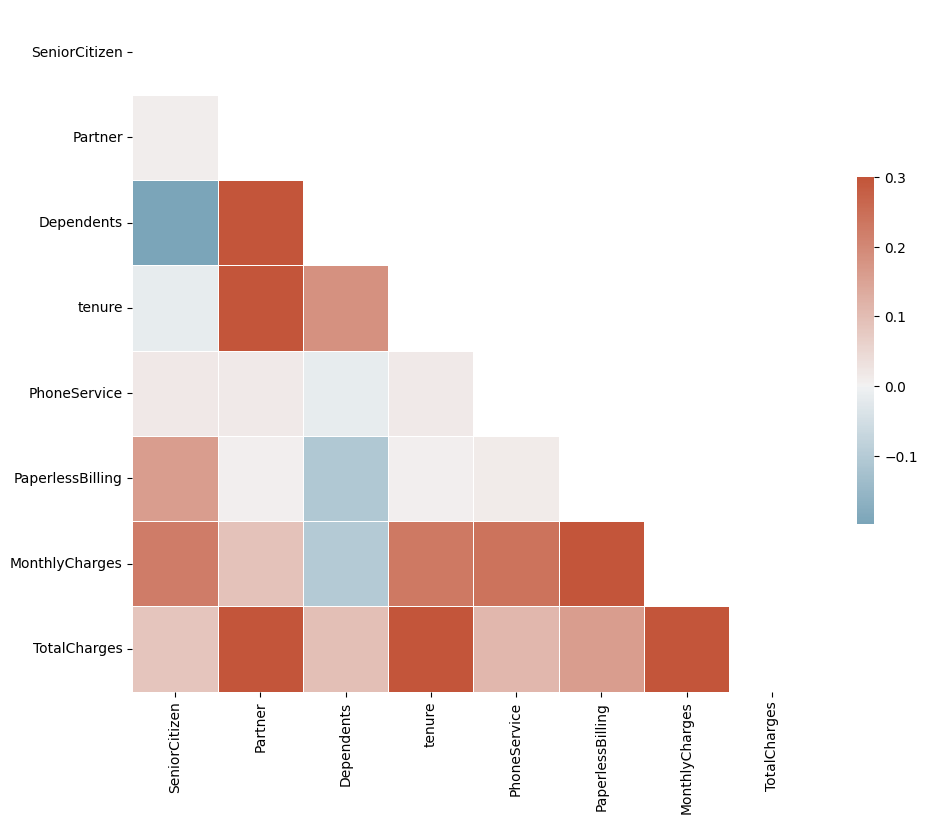

In [12]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

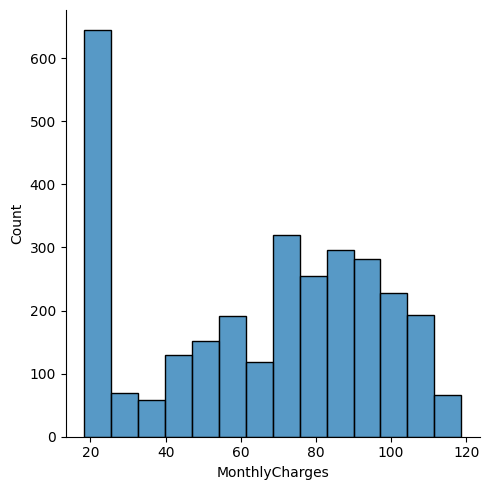

In [13]:
# distribution of monthly charges
sns.displot(data, x=data.MonthlyCharges)

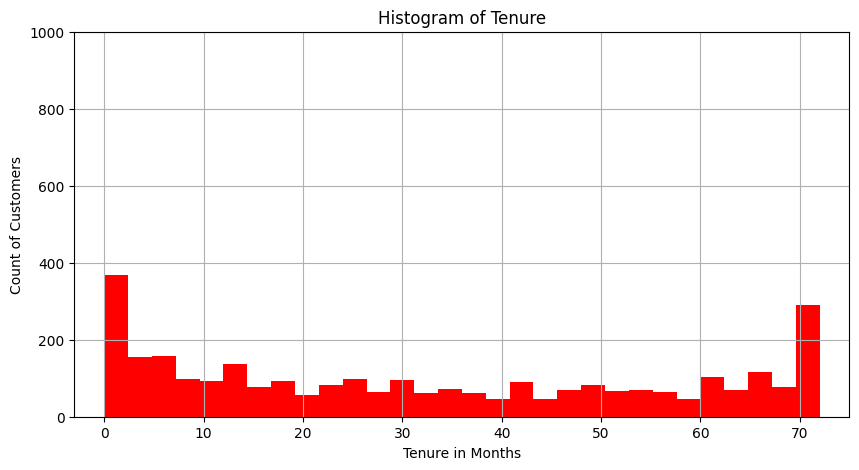

In [14]:
plt.figure(figsize=(10,5))
n, bins, patches = plt.hist(data.tenure, 30, facecolor='r', align='mid')


plt.xlabel('Tenure in Months')
plt.ylabel('Count of Customers')
plt.title('Histogram of Tenure')
plt.xlim(-3, 75)
plt.ylim(0, 1000)
plt.grid(True)
plt.show()

# Tenure by Months
* Customers at the beginning are most likely to churn 
* Customers also leave once they reach 70 months with the company

# How features affect churn?

### 1. First let us check Online security
* Null hypothesis = Online security feature doesn't affect churn
* Alternative hypothesis = Online security feature affect churn

#### A chi-square test is used to help determine if observed results are in line with expected results and to rule out that observations are due to chance.

In [15]:
# support and churn are two categorical features
# we can use the chi-square test for this
# import hypothesis testing
from scipy.stats import chi2_contingency
from scipy.stats import ttest_1samp
# set alpha first
alpha = .05

# create a cross table
table = pd.crosstab(data.Churn, data.OnlineSecurity)
print('Crosstab of churn and security:\n\n',table)

chi2, p, degf, expected = chi2_contingency(table)

print('\n\np = ',p)
print('\nRounded p value:',round(p,2))


Crosstab of churn and security:

 OnlineSecurity  False  True 
Churn                       
False             861    746
True              617    124


p =  2.6365457216168814e-43

Rounded p value: 0.0


#### Since p value is less than alpha value having online security affects a customer churning.
##### So we are reject Null hypothesis 

#### 2. Second let us check Tech support has impact on churn or not

* null hypothesis: having tech support does not affect churn
* alternative hypothesis: having tech support affects a customer churning

In [16]:
# support and churn are two categorical features
# we can use the chi-square test for this

# set alpha first
alpha = .05

# create a cross table
table = pd.crosstab(data.Churn, data.TechSupport)
print('Crosstab of churn and security:\n\n',table)

chi2, p, degf, expected = chi2_contingency(table)

print('\n\np = ',p)
print('\nRounded p_value:',round(p,2))

Crosstab of churn and security:

 TechSupport  False  True 
Churn                    
False          845    762
True           630    111


p =  2.579438071668035e-51

Rounded p_value: 0.0


similarly we are going to use chi square test 

#### 3. How does price Method affect churn?

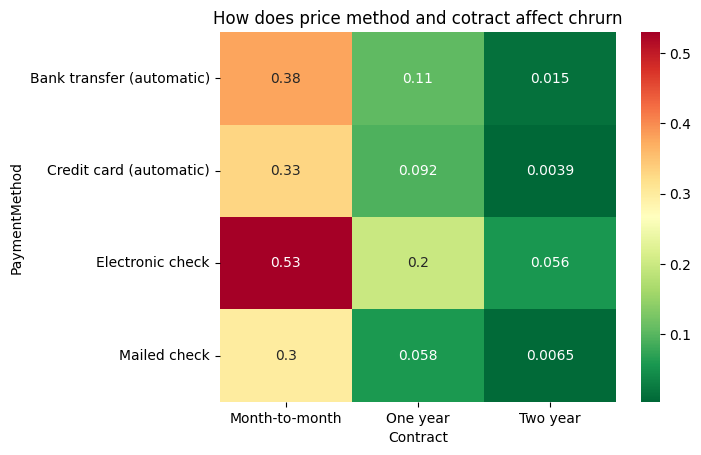

In [17]:
# create pivot table it can help us in multi-variant analysis
result = pd.pivot_table (data = data, index='PaymentMethod', columns = 'Contract', values= 'Churn')
sns.heatmap(result, annot=True, cmap='RdYlGn_r').set_title('How does price method and cotract affect chrurn')
plt.show()


We can directly see that customers with a month-to-month contract paying by electronic check are most likely to churn.  
While those with a two-year contract have a very low probability throughout.

#### 4 Does Online security or not cause different rates of churn?
* Null hypothesis: having online security does not affect churn
* Alternative hypothesis: having online security affects a customer churning

In [18]:

# set alpha first
alpha = .05

# create a cross table
table = pd.crosstab(data.Churn, data.OnlineSecurity)
print('Crosstab of churn and security:\n\n',table)

chi2, p, degf, expected = chi2_contingency(table)

print('\n\np = ',p)
print('\nRounded p_value:',round(p,2))

Crosstab of churn and security:

 OnlineSecurity  False  True 
Churn                       
False             861    746
True              617    124


p =  2.6365457216168814e-43

Rounded p_value: 0.0


* Null hypothesis rejected

Let’s look at the relationship between categorical and numerical variables:  
In our case, this would allow us to answer questions like 
* “Are churned customers likely to get charged more?”,  
* “When do customers churn?”, or “Are senior citizens more likely to churn?”.

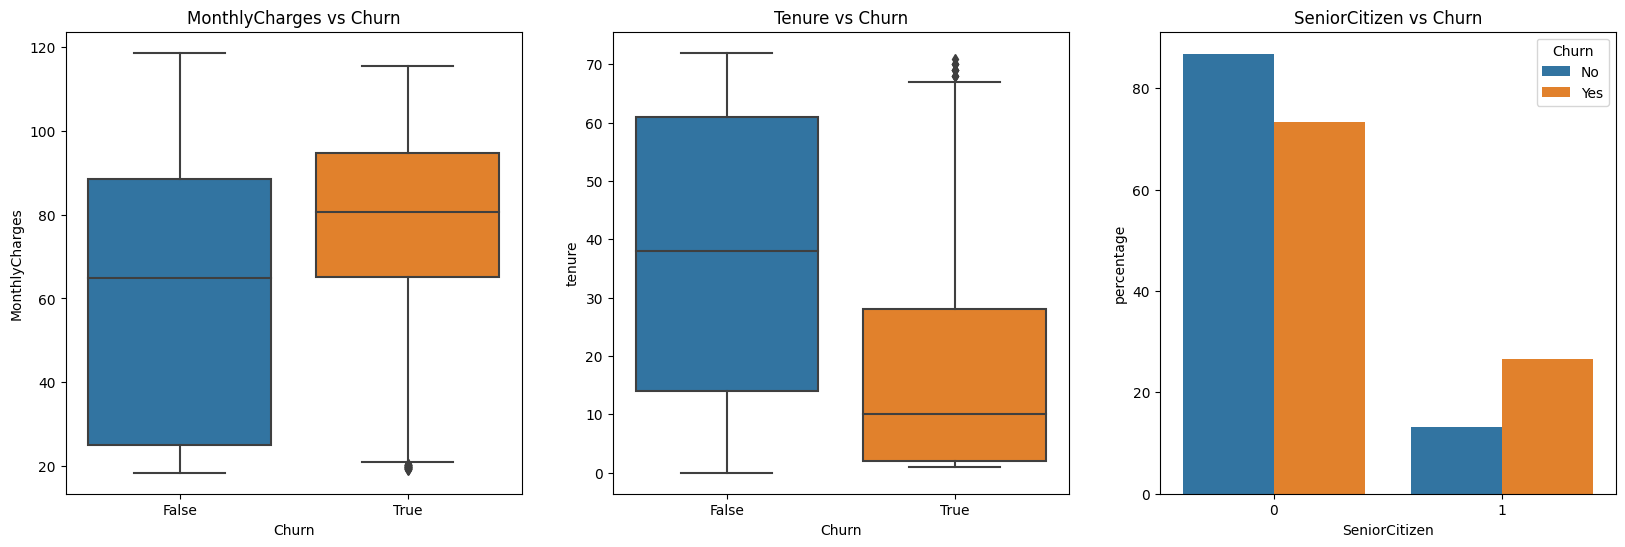

In [19]:
# Categorical-numerical variables
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

## Are churned customers likely to get charged more?
plt.subplot(1,3,1)
sns.boxplot(x= data['Churn'],y= data['MonthlyCharges'])
plt.title('MonthlyCharges vs Churn')

## When do customers churn?
plt.subplot(1,3,2)
sns.boxplot(x=data['Churn'],y= data['tenure'])
plt.title('Tenure vs Churn')

## Are senior citizen more likely to churn?
plt.subplot(1,3,3)
counts = (data2.groupby(['Churn'])['SeniorCitizen']
  .value_counts(normalize=True)
  .rename('percentage')
  .mul(100)
  .reset_index())
plot = sns.barplot(x="SeniorCitizen", y="percentage", hue="Churn",
                   data=counts).set_title('SeniorCitizen vs Churn')
# plt.show()

* We can clearly see from this that monthly charges for churning customers are higher, while tenure is much lower.  
* For senior citizens, there are actually more customers churning than staying with the company.   
* This might be indicative that we’re not focusing on the right customer segment.